<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


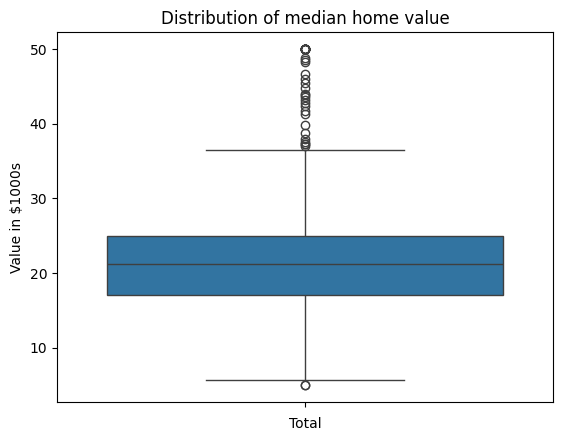

In [6]:
# Boxplot for median value of owner-occupied homes

ax_1 = sns.boxplot(y = 'MEDV', data = boston_df)
ax_1.set_title('Distribution of median home value')
ax_1.set_xlabel('Total')
ax_1.set_ylabel('Value in $1000s');

# Median home value in Boston is around 20000$, IQC ranges from 35000$ - 40000$ to less than 5000$. There are more exceptionally high value homes than low value homes.

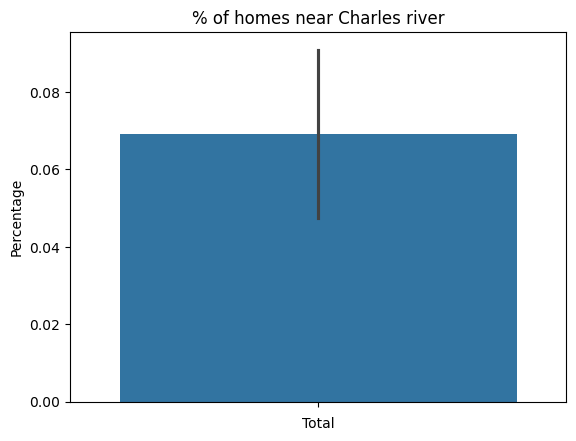

In [7]:
# Bar plot for the Charles river variable

ax_2 = sns.barplot(y = 'CHAS', data = boston_df)
ax_2.set_title('% of homes near Charles river')
ax_2.set_xlabel('Total')
ax_2.set_ylabel('Percentage');

# There are around 7% of homes near Charles river.

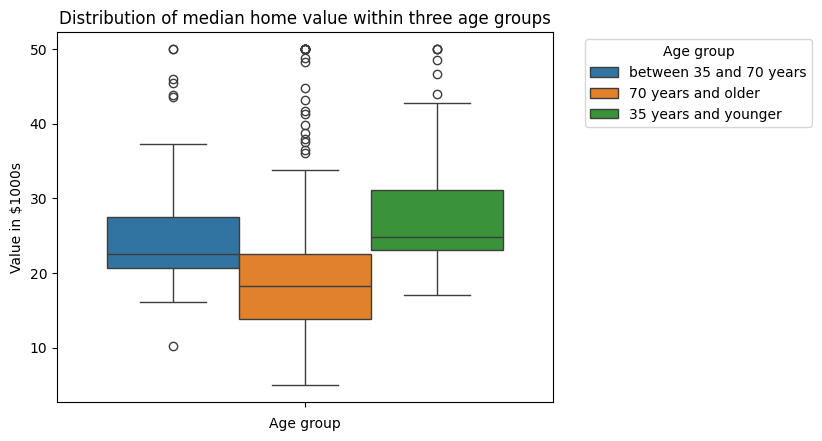

In [8]:
# Boxplot for the MEDV vs. AGE variable (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'Age group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age group'] = '70 years and older'

ax_3 = sns.boxplot(y = 'MEDV', hue = 'Age group', data = boston_df)
ax_3.legend(title = "Age group", bbox_to_anchor = (1.05, 1), loc = 'upper left')
ax_3.set_title('Distribution of median home value within three age groups')
ax_3.set_xlabel('Age group')
ax_3.set_ylabel('Value in $1000s');

# Age group 35 years and younger have highest valued homes, group 35 - 70 follows. However, there are many > 70 years old how have exceptionally high valued homes. 

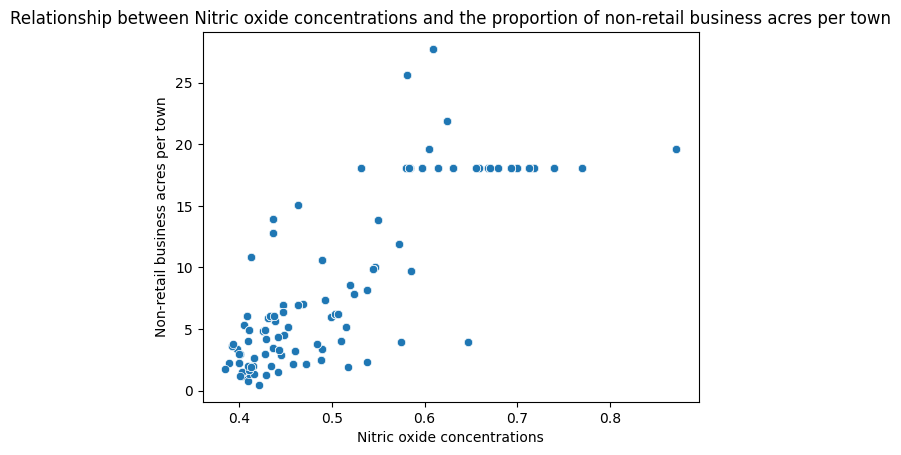

In [9]:
# Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

ax_4 = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
ax_4.set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
ax_4.set_xlabel('Nitric oxide concentrations')
ax_4.set_ylabel('Non-retail business acres per town');

# There is a positive relation between Nitrix oxide concentrations and the proportion of non-retail business acres per town.

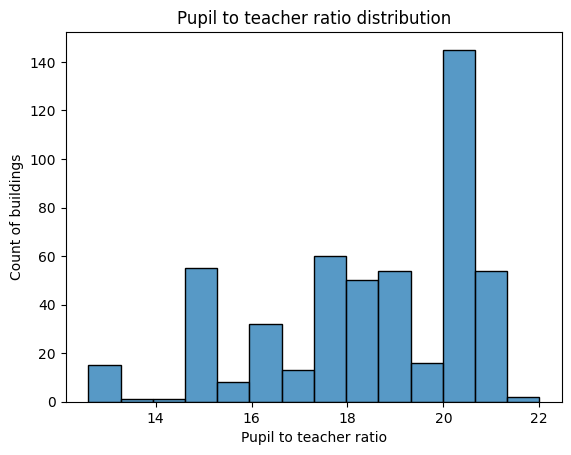

In [10]:
# Histogram for the pupil to teacher ratio variable

ax_5 = sns.histplot(x = 'PTRATIO', data = boston_df)
ax_5.set_title('Pupil to teacher ratio distribution')
ax_5.set_xlabel('Pupil to teacher ratio')
ax_5.set_ylabel('Count of buildings');

# Most of the homes are in the areas with standard 20 - 25 pupil to teacher ratio.

In [11]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

# LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)
# since the p-value is lower than 0.05 we can't assume equality of variance

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

# There is a significant difference between houses bounded by the Charles river and not bounded by the Charles river

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [12]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

below_35 = boston_df[boston_df['Age group'] == '35 years and younger']['MEDV']
between_35_and_70 = boston_df[boston_df['Age group'] == 'between 35 and 70 years']['MEDV']
above_70 = boston_df[boston_df['Age group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(below_35, between_35_and_70, above_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# There is a statistical difference between proportion of owner-occupied units built prior to 1940 and value of houses.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [13]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Correlaion is statisticly significant r = 0,76 p < 0,05. There is a strong positive correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [14]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

# Regression model is significant, R-squared = 0.06. Coef of weighted distance is 1.09, meaning that 1 point in distance increses the median house value by around 1100$. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        12:46:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""